### Training a neural network

Training in supervised learning is about finding a parameter set (weights and biases) for the neural network that such at best all labels of a labeled dataset are reproduced.

Having the network set up and provided a dataset to use for *supervised learning*, we are now in the position to train our network.

The training method is controlled by the option key `optimizer`. By default it's set to *GradientDescent*.

Moreover, the following options control the training:

- `batch_size` : if smaller than the dataset dimension, then we get Stochastic Gradient Descent (SGD)
- `learning_rate` : learning rate to use for training, i.e. scaling the gradient per step
- `loss` : type of training function to use
- `max_steps` : fixed amount of training steps to execute
- `seed` : influencing the random starting parameter choice

In [1]:
import sys
sys.path.insert(1, '/home/heber/packages/TATi-unstable/lib/python3.5/site-packages')


#### Available loss functions

Loss functions available in tensorflow are also available in `tati`. We can get a list as follows.

In [2]:
import TATi.simulation as tati

print(tati.get_losses())

['mean_squared', 'log_loss', 'hinge_loss', 'cosine_distance', 'absolute_difference', 'sigmoid_cross_entropy', 'softmax_cross_entropy']


#### Performing the fit

Let us use simple *mean_squared* for the moment to train a network on the provided dataset.

In [3]:
nn = tati(batch_data_files=["dataset-twoclusters.csv"],
          output_activation="linear",
          learning_rate=0.1,
          loss="mean_squared",
          max_steps=100,
          seed=426)
training_data = nn.fit()
print(nn.loss())

0.021974375


In [4]:
print(nn.parameters)

[0.14637233, 0.32722256, -0.045677684]


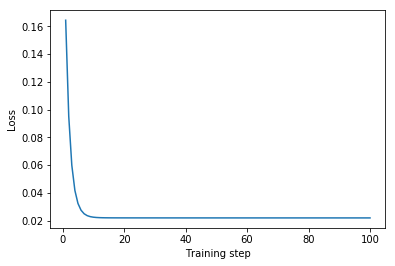

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

run = np.asarray(training_data.run_info.loc[:,['step','loss']].values)

plt.plot(run[:,0], run[:,1])
plt.xlabel("Training step")
plt.ylabel("Loss")
plt.show()

The loss has decreased well and is close to 0.

We can also look at other values.

In [6]:
print(training_data.run_info.columns)

Index(['id', 'step', 'epoch', 'accuracy', 'loss', 'time_per_nth_step',
       'scaled_gradient', 'virial'],
      dtype='object')


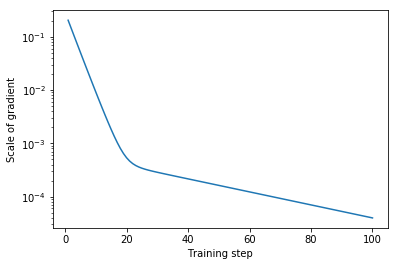

In [11]:
run = np.asarray(training_data.run_info.loc[:,['step','scaled_gradient']].values)

plt.semilogy(run[:,0], run[:,1])
plt.xlabel("Training step")
plt.ylabel("Scale of gradient")
plt.show()

Let us also look at the training trajectory.

Index(['id', 'step', 'loss', 'weight0', 'weight1', 'bias0'], dtype='object')


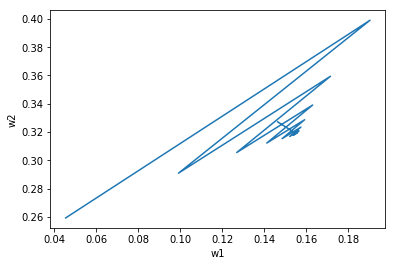

In [12]:
print(training_data.trajectory.columns)
trajectory = np.asarray(training_data.trajectory.loc[:,['weight0','weight1']].values)

plt.plot(trajectory[:,0], trajectory[:,1])
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

#### Predict labels of unknown data

Having trained a network, we would like to make predictions for new data that the network has not seen, yet.

To this end, we use the `predict()` function which needs to be supplied with the unknown features.

In [13]:
unknown_data = np.array([[0,0], [1,1], [-1,1], [1,-1], [-1,-1]])
print(np.sign(nn.predict(unknown_data)))

[[[-1.]
  [ 1.]
  [ 1.]
  [-1.]
  [-1.]]]


We get a list of labels, one per item, in return. We have used `numpy.sign` to turn this into a lists with entries in {-1,1}.